<a href="https://colab.research.google.com/github/glebmikha/data-analysis-master-class/blob/main/german_credit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Заливка данных

In [1]:
import pandas as pd
import numpy as np

Это ссылка на файл: https://drive.google.com/file/d/1pmGSMI2LuvsiBaBG5v7N8xfPedZbF020/view?usp=sharing

In [2]:
!gdown --id 1pmGSMI2LuvsiBaBG5v7N8xfPedZbF020

Downloading...
From: https://drive.google.com/uc?id=1pmGSMI2LuvsiBaBG5v7N8xfPedZbF020
To: /content/german-credit.csv
100% 50.5k/50.5k [00:00<00:00, 39.5MB/s]


In [3]:
df = pd.read_csv('/content/german-credit.csv')

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,1


# Предобработка

## Удаление столбца

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


## Переименование столбцов

In [7]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'default'],
      dtype='object')

In [8]:
df.columns = ['age', 'sex', 'job', 'housing', 'saving_accounts', 'checking_account',
       'credit_amount', 'duration', 'purpose', 'default']

In [9]:
df.columns = df.columns.str.replace(' ','_').str.lower()

## Пропуски

In [10]:
df.isna().mean()

age                 0.000
sex                 0.000
job                 0.000
housing             0.000
saving_accounts     0.183
checking_account    0.394
credit_amount       0.000
duration            0.000
purpose             0.000
default             0.000
dtype: float64

# Сводная таблица

## groupby

In [11]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [12]:
len(df)

1000

In [13]:
df['checking_account'] = df['checking_account'].fillna('no_info')

In [14]:
(df.groupby(['checking_account','sex'])
[['default','credit_amount']]
 .agg({'default':['count','mean'],
       'credit_amount':['mean','median']}))

default           credit_amount        
                          count      mean          mean  median
checking_account sex                                           
little           female      88  0.522727   2564.215909  1838.5
                 male       186  0.478495   3464.295699  2589.5
moderate         female      86  0.476744   3720.034884  2651.0
                 male       183  0.349727   3878.092896  2520.0
no_info          female     116  0.155172   2708.750000  1935.0
                 male       278  0.100719   3310.169065  2393.5
rich             female      20  0.200000   1616.050000  1400.5
                 male        43  0.232558   2438.860465  1925.0

## pivot_table

In [15]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,no_info,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [16]:
df.pivot_table(index='checking_account',
               columns='sex',
               values=['default','credit_amount'],
               aggfunc=['count','mean'],
       margins=True)

count             ...      mean                    
                 credit_amount             ...   default                    
sex                     female male   All  ...    female      male       All
checking_account                           ...                              
little                      88  186   274  ...  0.522727  0.478495  0.492701
moderate                    86  183   269  ...  0.476744  0.349727  0.390335
no_info                    116  278   394  ...  0.155172  0.100719  0.116751
rich                        20   43    63  ...  0.200000  0.232558  0.222222
All                        310  690  1000  ...  0.351613  0.276812  0.300000

[5 rows x 12 columns]

In [17]:
(df.groupby(['checking_account'])
[['default']]
 .agg(['count','mean']))

default          
                   count      mean
checking_account                  
little               274  0.492701
moderate             269  0.390335
no_info              394  0.116751
rich                  63  0.222222

In [18]:
(df.groupby(['checking_account'])
[['credit_amount']]
 .agg(['count','mean','median']))

credit_amount                     
                         count         mean  median
checking_account                                   
little                     274  3175.218978  2353.5
moderate                   269  3827.561338  2622.0
no_info                    394  3133.101523  2248.0
rich                        63  2177.650794  1881.0

## Форматирование

In [19]:
(df.groupby(['checking_account'])
[['default']]
 .agg(['count','mean']))

default          
                   count      mean
checking_account                  
little               274  0.492701
moderate             269  0.390335
no_info              394  0.116751
rich                  63  0.222222

In [20]:
(df.groupby('checking_account')
['default']
 .agg(['count','mean']))

,count,mean
checking_account,,
little,274,0.492701
moderate,269,0.390335
no_info,394,0.116751
rich,63,0.222222


In [21]:
(df.groupby(['checking_account'])['default']
.agg(['count', 'mean'])
.sort_values('count',ascending=False)
.style
.format({
    'mean': '{:,.1%}'.format,
})
.applymap(
     lambda x: 'background-color : green' if x>0.3 else '', 
     subset=['mean']))

,count,mean
checking_account,,
no_info,394,11.7%
little,274,49.3%
moderate,269,39.0%
rich,63,22.2%


In [22]:
df.groupby('checking_account')['default'].agg(['count','mean'])

,count,mean
checking_account,,
little,274,0.492701
moderate,269,0.390335
no_info,394,0.116751
rich,63,0.222222


In [23]:
t = df.pivot_table(index='checking_account',
               columns='sex',
               values=['default','credit_amount'],
               aggfunc=['count','mean'],
       margins=True)

In [24]:
t

count             ...      mean                    
                 credit_amount             ...   default                    
sex                     female male   All  ...    female      male       All
checking_account                           ...                              
little                      88  186   274  ...  0.522727  0.478495  0.492701
moderate                    86  183   269  ...  0.476744  0.349727  0.390335
no_info                    116  278   394  ...  0.155172  0.100719  0.116751
rich                        20   43    63  ...  0.200000  0.232558  0.222222
All                        310  690  1000  ...  0.351613  0.276812  0.300000

[5 rows x 12 columns]

In [25]:
t.columns

MultiIndex([('count', 'credit_amount', 'female'),
            ('count', 'credit_amount',   'male'),
            ('count', 'credit_amount',    'All'),
            ('count',       'default', 'female'),
            ('count',       'default',   'male'),
            ('count',       'default',    'All'),
            ( 'mean', 'credit_amount', 'female'),
            ( 'mean', 'credit_amount',   'male'),
            ( 'mean', 'credit_amount',    'All'),
            ( 'mean',       'default', 'female'),
            ( 'mean',       'default',   'male'),
            ( 'mean',       'default',    'All')],
           names=[None, None, 'sex'])

In [26]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [27]:
t

,count_credit_amount_female,count_credit_amount_male,count_credit_amount_All,count_default_female,count_default_male,count_default_All,mean_credit_amount_female,mean_credit_amount_male,mean_credit_amount_All,mean_default_female,mean_default_male,mean_default_All
checking_account,,,,,,,,,,,,
little,88,186,274,88,186,274,2564.215909,3464.295699,3175.218978,0.522727,0.478495,0.492701
moderate,86,183,269,86,183,269,3720.034884,3878.092896,3827.561338,0.476744,0.349727,0.390335
no_info,116,278,394,116,278,394,2708.750000,3310.169065,3133.101523,0.155172,0.100719,0.116751
rich,20,43,63,20,43,63,1616.050000,2438.860465,2177.650794,0.200000,0.232558,0.222222
All,310,690,1000,310,690,1000,2877.774194,3448.040580,3271.258000,0.351613,0.276812,0.300000


In [28]:
t.columns

Index(['count_credit_amount_female', 'count_credit_amount_male',
       'count_credit_amount_All', 'count_default_female', 'count_default_male',
       'count_default_All', 'mean_credit_amount_female',
       'mean_credit_amount_male', 'mean_credit_amount_All',
       'mean_default_female', 'mean_default_male', 'mean_default_All'],
      dtype='object')

## Пример анализа

In [29]:
df.groupby('checking_account')['default'].agg(['count','mean'])

,count,mean
checking_account,,
little,274,0.492701
moderate,269,0.390335
no_info,394,0.116751
rich,63,0.222222


Самый низкий процент должников в категории no_info

In [30]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,no_info,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [31]:
df.groupby('housing')['default'].agg(['count','mean'])

,count,mean
housing,,
free,108,0.407407
own,713,0.260870
rent,179,0.391061


Вывод

In [32]:
df.groupby('housing')['credit_amount'].agg(['count','mean','median'])

,count,mean,median
housing,,,
free,108,4906.212963,3800.5
own,713,3060.939691,2238.0
rent,179,3122.553073,2301.0


Вывод

In [33]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,no_info,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


## Бины

In [34]:
df['credit_amount_group'] = pd.cut(df['credit_amount'],5)

In [35]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,credit_amount_group
0,67,male,2,own,NaN,little,1169,6,radio/TV,0,"(231.826, 3884.8]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(3884.8, 7519.6]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(231.826, 3884.8]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(7519.6, 11154.4]"
4,53,male,2,free,little,little,4870,24,car,1,"(3884.8, 7519.6]"


In [36]:
df.groupby('credit_amount_group')['default'].agg(['count','mean'])

,count,mean
credit_amount_group,,
"(231.826, 3884.8]",738,0.256098
"(3884.8, 7519.6]",177,0.384181
"(7519.6, 11154.4]",57,0.403509
"(11154.4, 14789.2]",22,0.727273
"(14789.2, 18424.0]",6,0.666667


In [37]:
df['credit_amount_group2'] = pd.qcut(df['credit_amount'],5)

In [38]:
df.groupby('credit_amount_group2')['default'].agg(['count','mean'])

,count,mean
credit_amount_group2,,
"(249.999, 1262.0]",201,0.303483
"(1262.0, 1906.8]",199,0.241206
"(1906.8, 2852.4]",200,0.270000
"(2852.4, 4720.0]",200,0.260000
"(4720.0, 18424.0]",200,0.425000


In [39]:
df['credit_amount_group3'] = pd.cut(df['credit_amount'],[0,1000,2000,3000,5000,np.inf])

In [40]:
df.groupby('credit_amount_group3')['default'].agg(['count','mean'])

,count,mean
credit_amount_group3,,
"(0.0, 1000.0]",116,0.318966
"(1000.0, 2000.0]",316,0.265823
"(2000.0, 3000.0]",188,0.239362
"(3000.0, 5000.0]",192,0.291667
"(5000.0, inf]",188,0.414894


In [41]:
df['credit_amount_group4'] = pd.cut(df['credit_amount'],[0,1000,np.inf],labels=['0-1k','1k+'])

In [42]:
df.groupby('credit_amount_group4')['default'].agg(['count','mean'])

,count,mean
credit_amount_group4,,
0-1k,116,0.318966
1k+,884,0.297511


In [43]:
df['credit_amount_group5'] = pd.qcut(df['credit_amount'],5)

In [44]:
df.groupby('credit_amount_group5')['default'].agg(['count','mean'])

,count,mean
credit_amount_group5,,
"(249.999, 1262.0]",201,0.303483
"(1262.0, 1906.8]",199,0.241206
"(1906.8, 2852.4]",200,0.270000
"(2852.4, 4720.0]",200,0.260000
"(4720.0, 18424.0]",200,0.425000


## График

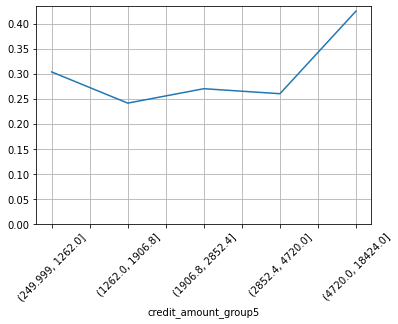

In [45]:
df.groupby('credit_amount_group5')['default'].mean().plot(rot=45,ylim=0,grid=True)

Вывод

# Распределение

## Категориальные (value_counts)

In [46]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,credit_amount_group,credit_amount_group2,credit_amount_group3,credit_amount_group4,credit_amount_group5
0,67,male,2,own,NaN,little,1169,6,radio/TV,0,"(231.826, 3884.8]","(249.999, 1262.0]","(1000.0, 2000.0]",1k+,"(249.999, 1262.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(3884.8, 7519.6]","(4720.0, 18424.0]","(5000.0, inf]",1k+,"(4720.0, 18424.0]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(231.826, 3884.8]","(1906.8, 2852.4]","(2000.0, 3000.0]",1k+,"(1906.8, 2852.4]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(7519.6, 11154.4]","(4720.0, 18424.0]","(5000.0, inf]",1k+,"(4720.0, 18424.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(3884.8, 7519.6]","(4720.0, 18424.0]","(3000.0, 5000.0]",1k+,"(4720.0, 18424.0]"


In [47]:
df['checking_account'].value_counts()

no_info     394
little      274
moderate    269
rich         63
Name: checking_account, dtype: int64

In [48]:
df['checking_account'].value_counts(normalize=True)

no_info     0.394
little      0.274
moderate    0.269
rich        0.063
Name: checking_account, dtype: float64

In [49]:
df['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

In [50]:
df['default'].value_counts(normalize=True)

0    0.7
1    0.3
Name: default, dtype: float64

In [51]:
df['default'].mean()

0.3

In [52]:
pd.get_dummies(df['checking_account'])

,little,moderate,no_info,rich
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
995,0,0,1,0
996,1,0,0,0
997,0,0,1,0
998,1,0,0,0


## Непрерывные (hist)

In [53]:
df['credit_amount'].value_counts()

1258    3
1478    3
1275    3
1393    3
1262    3
       ..
1345    1
1343    1
7485    1
3345    1
2051    1
Name: credit_amount, Length: 921, dtype: int64

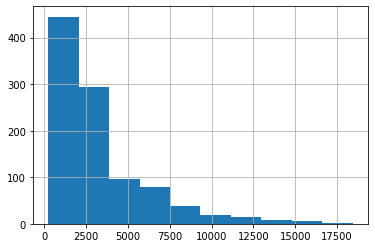

In [54]:
h = df['credit_amount'].hist()

In [55]:
def get_hist(ax):
    n,bins = [],[]
    for rect in ax.patches:
        ((x0, y0), (x1, y1)) = rect.get_bbox().get_points()
        n.append(y1-y0)
        bins.append(x0) # left edge of each bin
    bins.append(x1) # also get right edge of last bin

    return n,bins

n, bins = get_hist(h)

In [56]:
n

[445.0, 293.0, 97.0, 80.0, 38.0, 19.0, 14.0, 8.0, 5.0, 1.0]

In [57]:
bins

[249.9999999999999,
 2067.4,
 3884.7999999999997,
 5702.200000000001,
 7519.599999999999,
 9337.0,
 11154.400000000003,
 12971.800000000001,
 14789.2,
 16606.6,
 18424.0]

## Характеристики непрерывной переменной

In [58]:
df['credit_amount']

0      1169
1      5951
2      2096
3      7882
4      4870
       ... 
995    1736
996    3857
997     804
998    1845
999    4576
Name: credit_amount, Length: 1000, dtype: int64

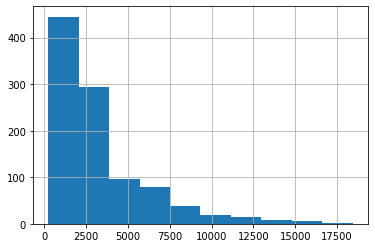

In [59]:
df['credit_amount'].hist()

In [60]:
df['credit_amount'].mean()

3271.258

In [61]:
t = pd.DataFrame({'salary':[20,30,20,40,50,40]})

In [62]:
t['salary'].mean()

33.333333333333336

In [63]:
t = pd.DataFrame({'salary':[20,30,20,40,50,40,10000000]})

In [64]:
t['salary'].mean()

1428600.0

In [65]:
t['salary'].median()

40.0

In [66]:
df['credit_amount'].agg(['mean','median'])

mean      3271.258
median    2319.500
Name: credit_amount, dtype: float64

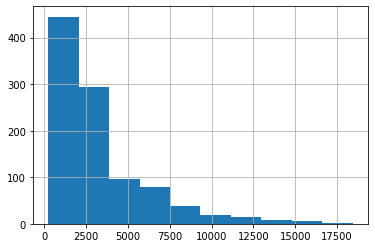

In [67]:
df['credit_amount'].hist()

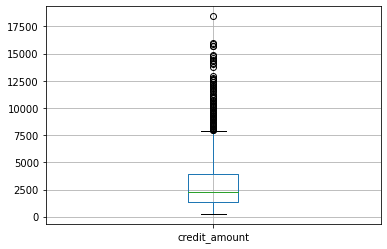

In [68]:
df.boxplot('credit_amount')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


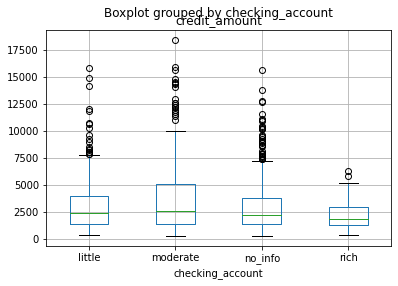

In [69]:
df.boxplot('credit_amount',by='checking_account')

In [70]:
df['credit_amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64

# Скаттер

## Скаттер плот

In [71]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,credit_amount_group,credit_amount_group2,credit_amount_group3,credit_amount_group4,credit_amount_group5
0,67,male,2,own,NaN,little,1169,6,radio/TV,0,"(231.826, 3884.8]","(249.999, 1262.0]","(1000.0, 2000.0]",1k+,"(249.999, 1262.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(3884.8, 7519.6]","(4720.0, 18424.0]","(5000.0, inf]",1k+,"(4720.0, 18424.0]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(231.826, 3884.8]","(1906.8, 2852.4]","(2000.0, 3000.0]",1k+,"(1906.8, 2852.4]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(7519.6, 11154.4]","(4720.0, 18424.0]","(5000.0, inf]",1k+,"(4720.0, 18424.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(3884.8, 7519.6]","(4720.0, 18424.0]","(3000.0, 5000.0]",1k+,"(4720.0, 18424.0]"


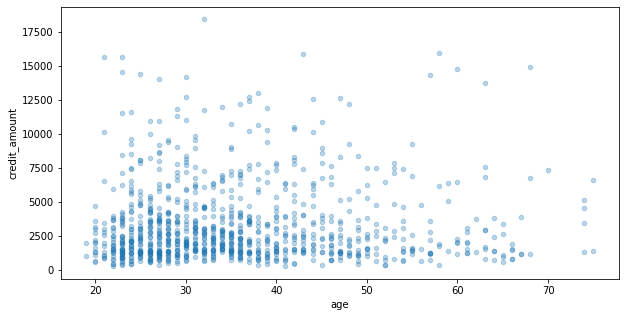

In [72]:
df.plot(x='age',y='credit_amount',kind='scatter',figsize=(10,5),alpha=0.3)

In [73]:
df['age_group'] = pd.qcut(df['age'],5)

In [74]:
df.groupby('age_group')['credit_amount'].agg(['count','mean','median'])

,count,mean,median
age_group,,,
"(18.999, 26.0]",240,2987.645833,2112.5
"(26.0, 30.0]",171,3436.578947,2463.0
"(30.0, 36.0]",216,3240.439815,2427.0
"(36.0, 45.0]",187,3618.401070,2522.0
"(45.0, 75.0]",186,3172.000000,2064.0


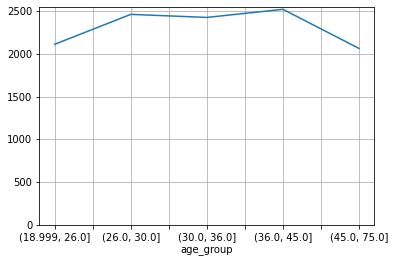

In [75]:
df.groupby('age_group')['credit_amount'].median().plot(ylim=0,grid=True)

## Корреляция

In [76]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,credit_amount_group,credit_amount_group2,credit_amount_group3,credit_amount_group4,credit_amount_group5,age_group
0,67,male,2,own,NaN,little,1169,6,radio/TV,0,"(231.826, 3884.8]","(249.999, 1262.0]","(1000.0, 2000.0]",1k+,"(249.999, 1262.0]","(45.0, 75.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(3884.8, 7519.6]","(4720.0, 18424.0]","(5000.0, inf]",1k+,"(4720.0, 18424.0]","(18.999, 26.0]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(231.826, 3884.8]","(1906.8, 2852.4]","(2000.0, 3000.0]",1k+,"(1906.8, 2852.4]","(45.0, 75.0]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(7519.6, 11154.4]","(4720.0, 18424.0]","(5000.0, inf]",1k+,"(4720.0, 18424.0]","(36.0, 45.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(3884.8, 7519.6]","(4720.0, 18424.0]","(3000.0, 5000.0]",1k+,"(4720.0, 18424.0]","(45.0, 75.0]"


In [77]:
df[['age','credit_amount']].corr()

,age,credit_amount
age,1.000000,0.032716
credit_amount,0.032716,1.000000


In [78]:
t = pd.DataFrame({'x':range(10)})

In [79]:
t['y'] = t['x'] + 7

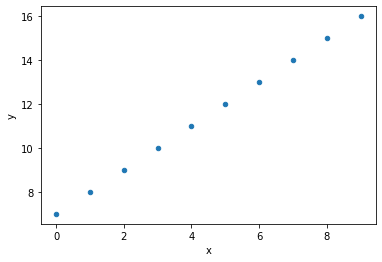

In [80]:
t.plot(x='x',y='y',kind='scatter')

In [81]:
t.corr()

,x,y
x,1.0,1.0
y,1.0,1.0


In [82]:
t['y'] = -t['x'] - 7

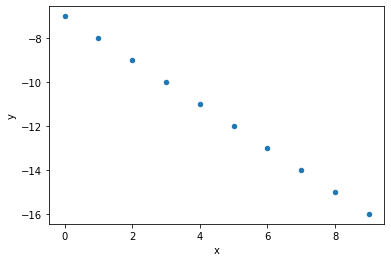

In [83]:
t.plot(x='x',y='y',kind='scatter')

In [84]:
t.corr()

,x,y
x,1.0,-1.0
y,-1.0,1.0


In [85]:
t = pd.DataFrame({'x':np.linspace(-10,10,100)})

In [86]:
t['y'] = t['x'] ** 2

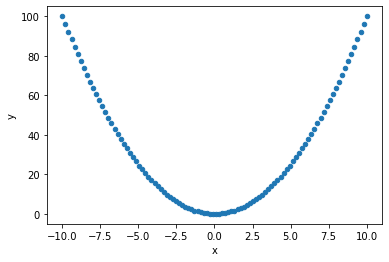

In [87]:
t.plot(x='x',y='y',kind='scatter')

In [88]:
t.corr()

,x,y
x,1.000000e+00,3.205184e-17
y,3.205184e-17,1.000000e+00


# Пример анализа

## Предобработка

Age (numeric)  
Sex (text: male, female)  
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)  
Housing (text: own, rent, or free)  
Saving accounts (text - little, moderate, quite rich, rich)  
Checking account (numeric, in DM - Deutsch Mark)  
Credit amount (numeric, in DM)  
Duration (numeric, in month)  
Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)  
default (1 - bad, 0 - good)


Задание: проанализировать от чего зависит default

In [89]:
df = pd.read_csv('/content/german-credit.csv')

In [90]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,1


In [91]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [95]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [97]:
df.isna().mean()

age                 0.000
sex                 0.000
job                 0.000
housing             0.000
saving_accounts     0.183
checking_account    0.394
credit_amount       0.000
duration            0.000
purpose             0.000
default             0.000
dtype: float64

Сделаю техническую замену пропусков

In [98]:
df['saving_accounts'].fillna('no_info',inplace=True)

In [99]:
df['checking_account'].fillna('no_info',inplace=True)

In [100]:
df.isna().mean()

age                 0.0
sex                 0.0
job                 0.0
housing             0.0
saving_accounts     0.0
checking_account    0.0
credit_amount       0.0
duration            0.0
purpose             0.0
default             0.0
dtype: float64

## Анализ

In [101]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,no_info,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,no_info,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [103]:
df['age_group'] = pd.qcut(df['age'],5)

In [104]:
df.groupby('age_group')['default'].agg(['count','mean'])

,count,mean
age_group,,
"(18.999, 26.0]",240,0.391667
"(26.0, 30.0]",171,0.315789
"(30.0, 36.0]",216,0.259259
"(36.0, 45.0]",187,0.262032
"(45.0, 75.0]",186,0.252688


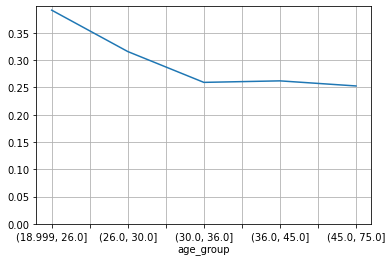

In [106]:
df.groupby('age_group')['default'].mean().plot(ylim=0,grid=True)

С увеличением возраста процент дефолтников снижается!

In [107]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,age_group
0,67,male,2,own,no_info,little,1169,6,radio/TV,0,"(45.0, 75.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(18.999, 26.0]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(45.0, 75.0]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(36.0, 45.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(45.0, 75.0]"


In [108]:
df.groupby('sex')['default'].agg(['count','mean'])

,count,mean
sex,,
female,310,0.351613
male,690,0.276812


Выборка перекошена -- мужчин в 2 раза больше чем женщин. И среди женщин дефолта сильно больше. Возможно влияние другой переменной? Возраст?

In [110]:
df.groupby('sex')['age'].agg(['count','mean','median'])

,count,mean,median
sex,,,
female,310,32.803226,29
male,690,36.778261,35


Действительно! Женщины в этой выборке моложе! Посмотрим в разрезе пола и возраста

In [112]:
df['age_group2'] = pd.qcut(df['age'],3)

In [113]:
df.groupby(['age_group2','sex'])['default'].agg(['count','mean'])

count      mean
age_group2     sex                    
(18.999, 28.0] female    154  0.409091
               male      180  0.327778
(28.0, 38.0]   female     83  0.385542
               male      263  0.235741
(38.0, 75.0]   female     73  0.191781
               male      247  0.283401

В молодом и среднем возрасте женщины хуже возвращают долг, а в более старшем наоборот: женщины возвращают долг лучше чем мужчины

In [114]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,age_group,age_group2
0,67,male,2,own,no_info,little,1169,6,radio/TV,0,"(45.0, 75.0]","(38.0, 75.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(18.999, 26.0]","(18.999, 28.0]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(45.0, 75.0]","(38.0, 75.0]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(36.0, 45.0]","(38.0, 75.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(45.0, 75.0]","(38.0, 75.0]"


0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled

In [117]:
job_dict = {0:"unskilled and non-resident",
            1:"unskilled and resident",
            2:"skilled",
            3: "highly skilled"}

In [118]:
job_dict

{0: 'unskilled and non-resident',
 1: 'unskilled and resident',
 2: 'skilled',
 3: 'highly skilled'}

In [120]:
df['job'] = df['job'].map(job_dict)

In [121]:
df.groupby('job')['default'].agg(['count','mean'])

,count,mean
job,,
highly skilled,148,0.344595
skilled,630,0.295238
unskilled and non-resident,22,0.318182
unskilled and resident,200,0.280000


Странно, что в skilled самый высокий дефолт. Возможно влияние другой перменной

In [123]:
df.groupby(['job','age_group2'])['default'].agg(['count','mean'])

count      mean
job                        age_group2                     
highly skilled             (18.999, 28.0]     21  0.523810
                           (28.0, 38.0]       68  0.220588
                           (38.0, 75.0]       59  0.423729
skilled                    (18.999, 28.0]    240  0.350000
                           (28.0, 38.0]      220  0.268182
                           (38.0, 75.0]      170  0.252941
unskilled and non-resident (18.999, 28.0]      9  0.555556
                           (28.0, 38.0]        4  0.250000
                           (38.0, 75.0]        9  0.111111
unskilled and resident     (18.999, 28.0]     64  0.343750
                           (28.0, 38.0]       54  0.351852
                           (38.0, 75.0]       82  0.182927

В skilled много молодых и это влияет на уровень дефолта

In [125]:
df.groupby('job')['credit_amount'].agg(['count','mean','median'])

,count,mean,median
job,,,
highly skilled,148,5435.493243,4459
skilled,630,3070.965079,2324
unskilled and non-resident,22,2745.136364,1416
unskilled and resident,200,2358.520000,1622


Но похоже, что главное влияние оказывает размер кредита! В hs и s размер кредита выше чем в unskilled. Посмотрим на влияние размера кредита на дефолт вообще

In [128]:
df['credit_amount_group'] = pd.qcut(df['credit_amount'],5)

In [129]:
df.groupby('credit_amount_group')['default'].agg(['count','mean'])

,count,mean
credit_amount_group,,
"(249.999, 1262.0]",201,0.303483
"(1262.0, 1906.8]",199,0.241206
"(1906.8, 2852.4]",200,0.270000
"(2852.4, 4720.0]",200,0.260000
"(4720.0, 18424.0]",200,0.425000


Да, чем больше кредит, тем выше дефолт рейт.

In [132]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,age_group,age_group2,credit_amount_group
0,67,male,skilled,own,no_info,little,1169,6,radio/TV,0,"(45.0, 75.0]","(38.0, 75.0]","(249.999, 1262.0]"
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,1,"(18.999, 26.0]","(18.999, 28.0]","(4720.0, 18424.0]"
2,49,male,unskilled and resident,own,little,no_info,2096,12,education,0,"(45.0, 75.0]","(38.0, 75.0]","(1906.8, 2852.4]"
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,0,"(36.0, 45.0]","(38.0, 75.0]","(4720.0, 18424.0]"
4,53,male,skilled,free,little,little,4870,24,car,1,"(45.0, 75.0]","(38.0, 75.0]","(4720.0, 18424.0]"


In [133]:
df.groupby('housing')['default'].agg(['count','mean'])

,count,mean
housing,,
free,108,0.407407
own,713,0.260870
rent,179,0.391061


Если дом в собственности, то дефолт гораздо ниже.

In [134]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,age_group,age_group2,credit_amount_group
0,67,male,skilled,own,no_info,little,1169,6,radio/TV,0,"(45.0, 75.0]","(38.0, 75.0]","(249.999, 1262.0]"
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,1,"(18.999, 26.0]","(18.999, 28.0]","(4720.0, 18424.0]"
2,49,male,unskilled and resident,own,little,no_info,2096,12,education,0,"(45.0, 75.0]","(38.0, 75.0]","(1906.8, 2852.4]"
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,0,"(36.0, 45.0]","(38.0, 75.0]","(4720.0, 18424.0]"
4,53,male,skilled,free,little,little,4870,24,car,1,"(45.0, 75.0]","(38.0, 75.0]","(4720.0, 18424.0]"
